Define problem.

Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

What are inputs to the model?

Tenure: Number of months a customer has stayed with company.
MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from IPython.display import display
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [3]:
!ls

Raul_scratch.ipynb


In [4]:
cd ..

/Users/raulcassieltorresponce/Documents/Capstone


In [5]:
df = pd.read_csv('./Data/Telco-Customer-Churn-data.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# I see one float so I'll change it to int to make it easier.
df['MonthlyCharges'] = df['MonthlyCharges'].astype(int)

In [8]:
# Noticed that there are empty rows in "TotalCharges" column
empty = df.loc[df['TotalCharges'] == ' ']
empty

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73,,No


In [9]:
# Deleted the rows with empty values in "TotalCharges"
df = df.drop([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754])
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74,306.6,Yes


In [10]:
df['TotalCharges'].value_counts()

20.2       11
19.75       9
19.9        8
20.05       8
19.65       8
           ..
7209        1
444.75      1
2169.75     1
291.9       1
765.45      1
Name: TotalCharges, Length: 6530, dtype: int64

In [11]:
# Drop the "customerID" column because it's not important
df = df.drop(columns=["customerID"])
df.tail(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74,306.6,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105,6844.5,No


When have they churned?

Figure out a correlation between the churn and not churned.

In [12]:
# Notice that most of the data is not int. If I want to do math I first have to pass 
# Yes = 1 and No = 0
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7032 non-null   object
 1   SeniorCitizen     7032 non-null   int64 
 2   Partner           7032 non-null   object
 3   Dependents        7032 non-null   object
 4   tenure            7032 non-null   int64 
 5   PhoneService      7032 non-null   object
 6   MultipleLines     7032 non-null   object
 7   InternetService   7032 non-null   object
 8   OnlineSecurity    7032 non-null   object
 9   OnlineBackup      7032 non-null   object
 10  DeviceProtection  7032 non-null   object
 11  TechSupport       7032 non-null   object
 12  StreamingTV       7032 non-null   object
 13  StreamingMovies   7032 non-null   object
 14  Contract          7032 non-null   object
 15  PaperlessBilling  7032 non-null   object
 16  PaymentMethod     7032 non-null   object
 17  MonthlyCharges

In [13]:
# These are the columns that only use Yes and No 
# yes_no = ['Churn', 'PaperlessBilling', 'Phoneservice', 'Dependents', 'Partner']

In [14]:
# Making all of the items in yes_no to 0 and 1
#     I can do this because the values are binary
df['Churn'] = df['Churn'].map({'Yes':1 ,'No':0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes':1 , 'No':0})
df['PhoneService'] = df['PhoneService'].map({'Yes':1 , 'No':0})
df['Dependents'] = df['Dependents'].map({'Yes':1 , 'No':0})
df['Partner'] = df['Partner'].map({'Yes':1 , 'No':0})
df['gender'] = df['gender'].map({'Female':1, 'Male':0})

In [15]:
# There are the columns that are not binary in their values
non_binary = df[['MultipleLines', 'InternetService', 'OnlineSecurity', 
 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
'StreamingMovies', 'Contract', 'PaymentMethod', 'MonthlyCharges']]

In [16]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29,29.85,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56,1889.5,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53,108.15,1


In [17]:
# This does not mean that we are only using the binary columns. 
#  This is just to have a clear understanding of the cleaning process.
# zero_one = df[['Churn', 'PaperlessBilling', 'PhoneService', 'Dependents', 'Partner', 'SeniorCitizen']]

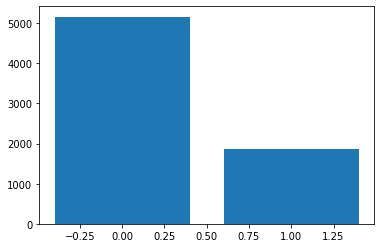

In [18]:
churn = df['Churn'].value_counts()
# visualization of churn and not churn
plt.bar(range(len(churn)), churn)
plt.show()

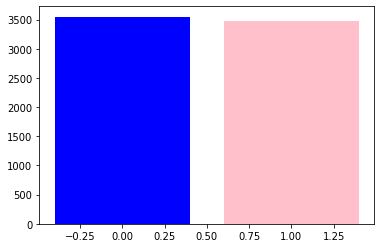

In [19]:
gender = df['gender'].value_counts()
# visualization of churn and not churn
plt.bar(range(len(gender)), gender, color=['blue', 'pink'])
plt.show()

Do this AFTER train test split!!!! 

To avoid data leaks

In [94]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 


In [96]:
# X value drops "Churn" and y values selects everything but Churn
X = df.drop(columns='Churn')
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((5625, 19), (1407, 19))

In [97]:
y.value_counts(normalize=True)

0    0.734215
1    0.265785
Name: Churn, dtype: float64

In [98]:
# # Scale the data
# ss = StandardScaler()
# ss.fit(X_train)
# X_train_scaled = ss.transform(X_train)
# X_test_scaled = ss.transform(X_test)

In [99]:
y_train.value_counts(normalize=True)

0    0.734222
1    0.265778
Name: Churn, dtype: float64

class imbalance in our target, about 73% 

DummyClassifier(strategy='most_frequent')

In [100]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6030,1,0,0,0,43,0,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,1,Bank transfer (automatic),49,2076.20
3410,0,0,0,0,3,1,No,DSL,No,No,No,No,Yes,No,Month-to-month,0,Credit card (automatic),53,188.70
5483,1,0,1,0,55,1,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,77,4458.15
5524,0,0,1,1,45,1,No,DSL,Yes,No,No,Yes,No,No,Two year,0,Bank transfer (automatic),54,2553.70
6337,1,0,1,1,55,1,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,One year,0,Mailed check,100,5448.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,0,0,0,0,3,1,Yes,DSL,No,No,No,No,No,No,Month-to-month,0,Bank transfer (automatic),50,137.25
5199,1,0,0,0,51,1,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,1,Electronic check,111,5703.25
5235,0,0,0,0,9,1,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,81,784.45
5399,1,0,0,0,50,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,0,Bank transfer (automatic),19,989.05


In [105]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 6030 to 862
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5625 non-null   int64  
 1   SeniorCitizen     5625 non-null   int64  
 2   Partner           5625 non-null   int64  
 3   Dependents        5625 non-null   int64  
 4   tenure            5625 non-null   int64  
 5   PhoneService      5625 non-null   int64  
 6   MultipleLines     5625 non-null   object 
 7   InternetService   5625 non-null   object 
 8   OnlineSecurity    5625 non-null   object 
 9   OnlineBackup      5625 non-null   object 
 10  DeviceProtection  5625 non-null   object 
 11  TechSupport       5625 non-null   object 
 12  StreamingTV       5625 non-null   object 
 13  StreamingMovies   5625 non-null   object 
 14  Contract          5625 non-null   object 
 15  PaperlessBilling  5625 non-null   int64  
 16  PaymentMethod     5625 non-null   object

In [107]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [41]:
from sklearn.compose import make_column_transformer 

In [108]:
column_trans = make_column_transformer((StandardScaler(), ['tenure', 'TotalCharges', 'MonthlyCharges']), 
                                       (ohe, ['MultipleLines', 'InternetService', 'OnlineSecurity', 
                                              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                                              'StreamingMovies', 'Contract', 'PaymentMethod']), remainder='passthrough')

In [109]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 ['tenure', 'TotalCharges', 'MonthlyCharges']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['MultipleLines', 'InternetService',
                                  'OnlineSecurity', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'StreamingTV', 'StreamingMovies', 'Contract',
                                  'PaymentMethod'])])

In [114]:
column_trans.fit_transform(X_train)

array([[ 0.43467403, -0.08790784, -0.50473651, ...,  0.        ,
         0.        ,  1.        ],
       [-1.19565249, -0.92128463, -0.37217159, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.92377199,  0.96378055,  0.42321792, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [-0.95110351, -0.65824663,  0.55578284, ...,  0.        ,
         1.        ,  1.        ],
       [ 0.71998118, -0.56791079, -1.4989734 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.50276372, -0.35842967,  0.290653  , ...,  0.        ,
         1.        ,  1.        ]])

#### Logistic Regression

In [126]:
logreg = LogisticRegression(random_state=42)

In [127]:
from sklearn.pipeline import make_pipeline

In [128]:
pipe = make_pipeline(column_trans, logreg)

In [129]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['tenure', 'TotalCharges',
                                                   'MonthlyCharges']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                      

In [130]:
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

0.8062222222222222

#### Decision Tree

In [143]:
ct = DecisionTreeClassifier(random_state=42)
ct.fit(X_train, y_train)

ValueError: could not convert string to float: 'No phone service'

#### Random Forest

In [140]:
rand_fore = RandomForestClassifier()

In [136]:
pipe_forest = make_pipeline(column_trans, rand_fore)

In [139]:
cross_val_score(pipe_forest, X_train, y_train, cv=5, scoring='accuracy').mean()

0.7921777777777779

In [131]:
log_maxiter = LogisticRegression(random_state=42, max_iter=1000)

In [132]:
pipe_maxiter = make_pipeline(column_trans, log_maxiter)

In [134]:
cross_val_score(pipe_maxiter, X_train, y_train, cv=5, scoring='accuracy').mean()

increase the number of iterations

In [73]:
y_train.value_counts(normalize=False)

0    4130
1    1495
Name: Churn, dtype: int64

In [58]:
# There are the columns that are not binary in their values
non_binary = X_train[['MultipleLines', 'InternetService', 'OnlineSecurity', 
 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
'StreamingMovies', 'Contract', 'PaymentMethod']]

In [59]:
non_binary

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
6030,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Bank transfer (automatic)
3410,No,DSL,No,No,No,No,Yes,No,Month-to-month,Credit card (automatic)
5483,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Electronic check
5524,No,DSL,Yes,No,No,Yes,No,No,Two year,Bank transfer (automatic)
6337,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,One year,Mailed check
...,...,...,...,...,...,...,...,...,...,...
3778,Yes,DSL,No,No,No,No,No,No,Month-to-month,Bank transfer (automatic)
5199,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Electronic check
5235,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Electronic check
5399,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Bank transfer (automatic)


In [60]:
# we got rid of "MultipleLines" and deleted the Yes column after doing dummies
#      it is better to use OHE because get_dummies does not work in pipeline. OHE is from sklearn
non_zero_one = pd.get_dummies(non_binary,drop_first=True)

In [61]:
# The first line is just to see all the columns
pd.options.display.max_columns = None
non_zero_one

,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6030,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
3410,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
5483,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5524,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
6337,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5199,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0
5235,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5399,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0


In [70]:
X_train = X_train.drop(['MultipleLines', 'InternetService', 'OnlineSecurity', 
 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
'StreamingMovies', 'Contract', 'PaymentMethod'], axis=1)

In [71]:
X_train = pd.merge(X_train, non_zero_one, right_index=True, left_index=True)
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service_x,MultipleLines_Yes_x,InternetService_Fiber optic_x,InternetService_No_x,OnlineSecurity_No internet service_x,OnlineSecurity_Yes_x,OnlineBackup_No internet service_x,OnlineBackup_Yes_x,DeviceProtection_No internet service_x,DeviceProtection_Yes_x,TechSupport_No internet service_x,TechSupport_Yes_x,StreamingTV_No internet service_x,StreamingTV_Yes_x,StreamingMovies_No internet service_x,StreamingMovies_Yes_x,Contract_One year_x,Contract_Two year_x,PaymentMethod_Credit card (automatic)_x,PaymentMethod_Electronic check_x,PaymentMethod_Mailed check_x,MultipleLines_No phone service_y,MultipleLines_Yes_y,InternetService_Fiber optic_y,InternetService_No_y,OnlineSecurity_No internet service_y,OnlineSecurity_Yes_y,OnlineBackup_No internet service_y,OnlineBackup_Yes_y,DeviceProtection_No internet service_y,DeviceProtection_Yes_y,TechSupport_No internet service_y,TechSupport_Yes_y,StreamingTV_No internet service_y,StreamingTV_Yes_y,StreamingMovies_No internet service_y,StreamingMovies_Yes_y,Contract_One year_y,Contract_Two year_y,PaymentMethod_Credit card (automatic)_y,PaymentMethod_Electronic check_y,PaymentMethod_Mailed check_y
6030,1,0,0,0,43,0,1,49,2076.2,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
3410,0,0,0,0,3,1,0,53,188.7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
5483,1,0,1,0,55,1,1,77,4458.15,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5524,0,0,1,1,45,1,0,54,2553.7,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
6337,1,0,1,1,55,1,0,100,5448.6,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,0,0,0,0,3,1,0,50,137.25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5199,1,0,0,0,51,1,1,111,5703.25,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0
5235,0,0,0,0,9,1,1,81,784.45,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5399,1,0,0,0,50,1,0,19,989.05,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0


In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, RandomizedSearchCV


In [80]:
Simple_tree = DecisionTreeClassifier(random_state=42)

Simple_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [82]:
cv_results = cross_validate(
                    estimator=Simple_tree,
                    X=X_train,
                    y=y_train,
                    cv=10,
                    return_train_score=True, 
                    n_jobs=-2)

In [81]:
number_columns = X_train[["tenure", "MonthlyCharges", "TotalCharges"]]
number_columns

,tenure,MonthlyCharges,TotalCharges
6030,43,49,2076.2
3410,3,53,188.7
5483,55,77,4458.15
5524,45,54,2553.7
6337,55,100,5448.6
...,...,...,...
3778,3,50,137.25
5199,51,111,5703.25
5235,9,81,784.45
5399,50,19,989.05


In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
stndrd = StandardScaler()
number_columns = stndrd.fit_transform(number_columns)

In [86]:
number_columns

array([[ 0.43467403, -0.50473651, -0.08790784],
       [-1.19565249, -0.37217159, -0.92128463],
       [ 0.92377199,  0.42321792,  0.96378055],
       ...,
       [-0.95110351,  0.55578284, -0.65824663],
       [ 0.71998118, -1.4989734 , -0.56791079],
       [-0.50276372,  0.290653  , -0.35842967]])

non_zero_one has all the values that include the no/yes/no service. 
You have to scale the data frame above "number_columns" and then combine:

X_train but drop the columns that were used in "non_zero_one" 
"number_columns" after scaled and re-name everything into X_train

In [118]:
type(number_columns['TotalCharges'])

pandas.core.series.Series

In [65]:
# Now, we see that this is possible and could potentially work but
#      it would be easier if we create a pipeline

In [23]:
from sklearn.compose import make_column_transformer

In [27]:
from sklearn.pipeline import make_pipeline

In [143]:
models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(learning_rate=0.01, n_estimators=400, max_depth=13),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'SVC': SVC(kernel='linear'),
    'XGBClassifier': XGBClassifier()
}

Onehot for the other yes/no/idk

At this point I cleaned all the binary data points but now I have to do OneHotEncoder for the rest of the Columns

Do i need to scale?
inside a pipeline and you can do the yes/no/idk in it

get a dummy and then simple (tree...random...)
perform cross val to 

overfit very good on train data and not on unseen. 